https://www.youtube.com/watch?v=ok2s1vV9XW0

Machine Learning Tutorial Python - 11 Random Forest

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [124]:
data_raw = pd.read_csv('titanic.csv')

In [125]:
data_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
data_drop = data_raw.drop(['PassengerId', 'Name',  'SibSp', 'Cabin', 'Parch', 'Ticket', 'Embarked'], axis = 1)

In [127]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Age HAS 177 EMPTY VALUES, WE REPLACED WITH THE MEAN OF THIS COLUMN

In [128]:
data_drop.Age = data_drop.Age.fillna(data_drop.Age.mean())

In [129]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [130]:
data_drop.shape

(891, 5)

DUMMIES CONVERSION

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
le_Sex = LabelEncoder()

In [133]:
data_drop['Sex_n'] = le_Sex.fit_transform(data_drop['Sex'])

In [134]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [135]:
data_clean = data_drop.copy()

In [136]:
data_clean.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [137]:
data_clean.describe()

,Survived,Pclass,Age,Fare,Sex_n
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.647587
std,0.486592,0.836071,13.002015,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


In [138]:
data_clean = data_clean.drop(['Sex'], axis = 1)

In [139]:
data_clean.head()

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


SELECTING THE INPUT AND THE TARGET

In [156]:
unscaled_inputs = data_clean.drop(['Survived'], axis = 1)

In [157]:
Y = data_clean['Survived']

In [158]:
unscaled_inputs.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [159]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

STANDARDIZE THE DATA, WITHOUT INCLUDING THE DUMMIES VALUES 

In [160]:
# standardize the inputs

# standardization is one of the most common preprocessing tools
# since data of different magnitude (scale) can be biased towards high values,
# we want all inputs to be of similar magnitude
# this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data

# a very useful module we can use is StandardScaler 
# it has much more capabilities than the straightforward 'preprocessing' method
from sklearn.preprocessing import StandardScaler


# we will create a variable that will contain the scaling information for this particular dataset
# here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# define scaler as an object
Standard_scaler = StandardScaler()

In [161]:
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [162]:
# check what are all columns that we've got
unscaled_inputs.columns.values

array(['Pclass', 'Age', 'Fare', 'Sex_n'], dtype=object)

In [163]:
# choose the columns to scale
# we later augmented this code and put it in comments
# columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       #'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet']
    
# select the columns to omit
columns_to_omit = ['Sex_n']

In [164]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [165]:
# declare a scaler object, specifying the columns you want to scale
Standard_scaler = CustomScaler(columns_to_scale)

In [166]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
Standard_scaler.fit(unscaled_inputs)

C:\Users\gusal\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Pclass', 'Age', 'Fare'], copy=None, with_mean=None,
             with_std=None)

In [167]:
# standardizes the data, using the transform method 
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data. 
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
scaled_inputs = Standard_scaler.transform(unscaled_inputs)

In [168]:
scaled_inputs

,Pclass,Age,Fare,Sex_n
0,0.827377,-0.592481,-0.502445,1
1,-1.566107,0.638789,0.786845,0
2,0.827377,-0.284663,-0.488854,0
3,-1.566107,0.407926,0.420730,0
4,0.827377,0.407926,-0.486337,1
...,...,...,...,...
886,-0.369365,-0.207709,-0.386671,1
887,-1.566107,-0.823344,-0.044381,0
888,0.827377,0.000000,-0.176263,0
889,-1.566107,-0.284663,-0.044381,1


SELECTING DATA TO TRAING AND TO TEST

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train, x_test, y_train,  y_test = train_test_split(scaled_inputs,Y, test_size = 0.2, random_state=42)

RUNNING THE FOREST TREE MODEL

In [171]:
model = RandomForestClassifier(n_estimators=20)

In [172]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [174]:
model.score(x_test,y_test)

0.7988826815642458

FINDING THE PROBABILITY OF SURVIVE

In [175]:
model.predict_proba(x_test[:10])

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.55      , 0.45      ],
       [0.1       , 0.9       ],
       [0.28329823, 0.71670177],
       [0.7       , 0.3       ],
       [0.5       , 0.5       ],
       [0.        , 1.        ]])

CONFUSION MATRIX

In [176]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[90, 15],
       [21, 53]], dtype=int64)

In [177]:
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,90,15
Actual 1,21,53


manual accuracy

In [178]:
Act_0_predic_0 = 90
Act_1_predic_1 = 24
Total = 90+15+20+54


In [179]:
Accuracy = (Act_0_predic_0 + Act_1_predic_1)*100/Total
Accuracy

63.687150837988824

TO VISUALIZE THE CONFUSION MATRIX

Text(57.5, 0.5, 'Truth')

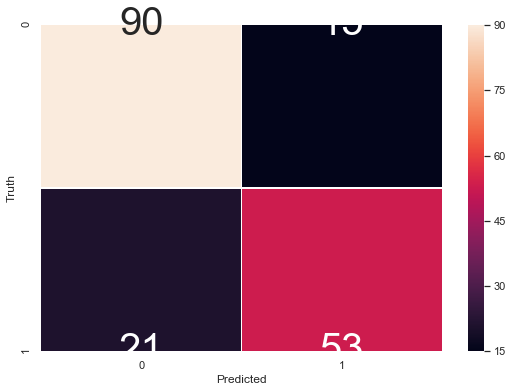

In [180]:
plt.figure(figsize = (9,6))
sns.heatmap(cm, annot = True,annot_kws={'size':40}, linewidths=.5)
#plt.xlim(-1, 10)
#plt.ylim(-30, 80)
plt.xlabel("Predicted")
plt.ylabel("Truth")